<a href="https://colab.research.google.com/github/japnit01/Handwritten_digits/blob/main/Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import keras

In [26]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

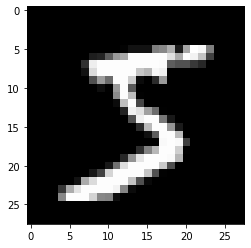

5


In [28]:
#viewing the sample
plt.imshow(x_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [29]:
print(format(x_train.shape))
print(format(x_test.shape))
print(format(y_train.shape))
print(format(y_test.shape))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [30]:
#reshaping the images for our model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [31]:
print(format(x_train.shape))
print(format(x_test.shape))
print(format(y_train.shape))
print(format(y_test.shape))

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [32]:
#one hot encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


1) The first layer takes in an input shape, 28, 28, 1 where 1 is greyscale.
2) The second layer there is flatten layer b/w the Conv2D layers and the dense layer. Flatten serves as a connection between convolutional and dense layer
3) taking 10 nodes in our output layer, one for each poss outcome (0-9)
4) Softmax makes the output sum up to 1, so that the output contains a series of probabilities.

In [34]:
model = Sequential()

#making layers 
model.add(Conv2D(64,(3,3), activation='relu', input_shape =(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

Compiling the model

1)Optimizer - It controls the learning rate.
2)Loss function - 'categorical_crossentropy' loss function. A lower score corresponds to better performance.
3)Metric - metric is set to accuracy to see the accuracy score on the validation set while training the model.

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2274 - accuracy: 0.9505 - val_loss: 0.0960 - val_accuracy: 0.9697
Epoch 2/5
1875/1875 [==============================] - 164s 88ms/step - loss: 0.0712 - accuracy: 0.9775 - val_loss: 0.0921 - val_accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0835 - val_accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.1145 - val_accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.1323 - val_accuracy: 0.9723


In [37]:
test_image = x_train[1]
prediction = model.predict(test_image.reshape(1, 28, 28, 1))

In [38]:
pred_arr = np.zeros(prediction.shape)
pred_arr[0][np.argmax(prediction)] =1
print(pred_arr)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


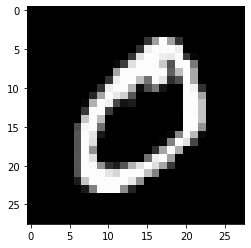

In [39]:
plt.imshow(test_image.reshape(28,28),cmap="gray")
plt.show()

In [48]:
print(np.argmax(prediction))

0


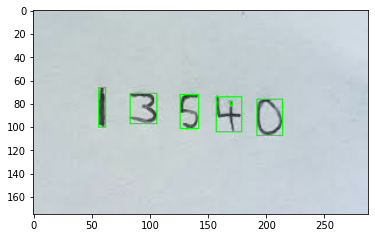

In [99]:
import cv2 
img = cv2.imread('/content/download1.jpg')
img1 = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img1.copy(), 135, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

arr_digits = []

for c in contours:
    x,y,l,b = cv2.boundingRect(c)
    plt.imshow(cv2.rectangle(img, (x,y), (x+l, y+b), color=(0, 255, 0), thickness=1)) 
    digit = thresh[y:y+b, x:x+l]
    resized_digit = cv2.resize(digit, (18,18))
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    arr_digits.append(padded_digit)
    #print(preprocessed_digits)
#plt.imshow(image, cmap="gray")
#plt.show()

In [100]:
inp = np.array(arr_digits)

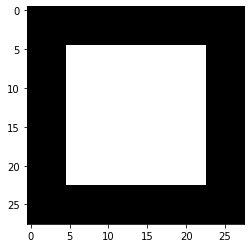

0
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


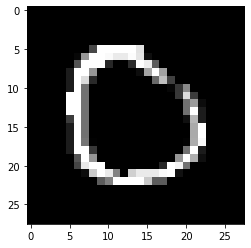

0
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


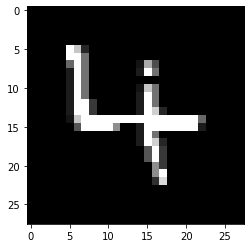

7
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


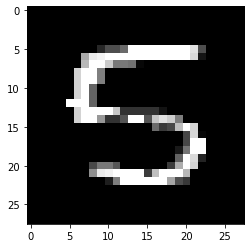

8
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


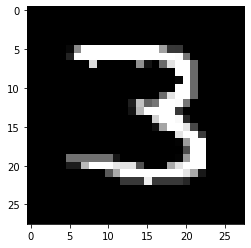

3
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


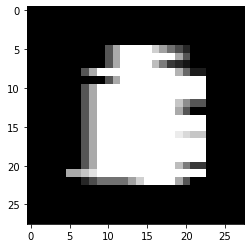

6
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [102]:
for i in arr_digits :
     prediction = model.predict(i.reshape(1,28,28,1))
     plt.imshow(i.reshape(28,28),cmap="gray")
     plt.show()
     print(np.argmax(prediction))
     pred_arr = np.zeros(prediction.shape)
     pred_arr[0][np.argmax(prediction)] =1
     print(pred_arr)